In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
import os
# sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
# import jsm_halopull
# import jsm_SHMR
# import jsm_mcmc
# import jsm_stats
# import jsm_models

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points


In [25]:
tree_data = np.load("/netb/vdbosch/jsm99/data/Mres_3_10k/tree_22_evo.npz")

for i in tree_data.keys():
    print(i)

redshift
CosmicTime
mass
order
ParentID
VirialRadius
GreenRte
concentration
coordinates


In [4]:
thin = 25 

def main_progenitor_history(datadir, Ntree):

    files = []    
    for filename in os.listdir(datadir):
        if filename.startswith('tree') and filename.endswith('evo.npz'): 
            files.append(os.path.join(datadir, filename))

    host_mat = np.zeros(shape=(Ntree,354))
    N_sub = np.zeros(shape=Ntree)
    for i, file in enumerate(files[0:Ntree]):
        tree_data_i = np.load(file)
        if tree_data_i["mass"][0,:].shape[0] == 354:
            host_mat[i] = np.log10(tree_data_i["mass"][0,:])
            surv = []
            for j, val in enumerate(tree_data_i["mass"]):
                final_mass = val[0]
                peak_mass = val.max()
                if np.log10(final_mass) - np.log10(peak_mass) > -4:
                    surv.append(j)
            N_sub[i] = len(surv)

    quant = np.percentile(host_mat, np.array([5, 50, 95]), axis=0, method="closest_observation")
    error = np.array([quant[1][::thin] - quant[0][::thin], quant[2][::thin] - quant[1][::thin]])

    return host_mat, quant, error, N_sub

In [5]:
mat_delta, quant_delta, error_delta, N_sub_delta = main_progenitor_history("/netb/vdbosch/jsm99/data/Mres_3_10k/", Ntree=1000)
mat_sigma, quant_sigma, error_sigma, N_sub_sigma = main_progenitor_history("/netb/vdbosch/jsm99/data/Mhost_3_10k/", Ntree=1000)

In [6]:
print(N_sub_sigma.std(), N_sub_sigma.mean(), N_sub_sigma.max())

34.34605408194658 93.663 242.0


In [7]:
print(N_sub_delta.std(), N_sub_delta.mean(), N_sub_delta.max())

8.234834303129603 87.748 113.0


In [8]:
norm = Normalize(vmin=60, vmax=200)
cmap = plt.get_cmap('RdBu_r')
select = np.random.randint(0,1000,1000)

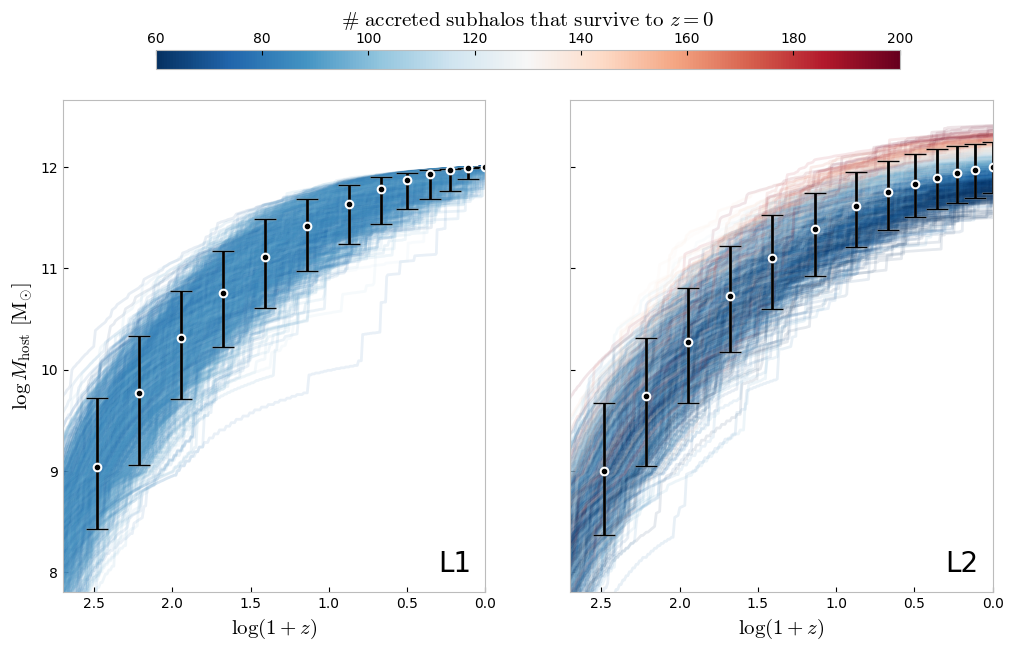

In [10]:
fig, axs = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(12,8))

for i in range(1000):
    axs[0].plot(np.log(tree_data["redshift"]+1), mat_delta[i], color=cmap(norm(N_sub_delta[i])), alpha=0.1)
    axs[1].plot(np.log(tree_data["redshift"]+1), mat_sigma[i], color=cmap(norm(N_sub_sigma[i])), alpha=0.1)

axs[0].errorbar(np.log(tree_data["redshift"][::thin]+1), quant_delta[1][::thin], yerr=error_delta, fmt="o", capsize=8, color="white")
axs[0].errorbar(np.log(tree_data["redshift"][::thin]+1), quant_delta[1][::thin], yerr=error_delta, fmt=".", capsize=8, color="black")
axs[0].text(0.3, 8, "L1", fontsize=20)
axs[1].errorbar(np.log(tree_data["redshift"][::thin]+1), quant_sigma[1][::thin], yerr=error_sigma, fmt="o", capsize=8, color="white")
axs[1].errorbar(np.log(tree_data["redshift"][::thin]+1), quant_sigma[1][::thin], yerr=error_sigma, fmt=".", capsize=8, color="black")

axs[1].text(0.3, 8, "L2", fontsize=20)

axs[0].set_xlim(2.7,0)
axs[0].set_ylim(7.8)
axs[0].set_xlabel("$\log (1+z)$")
axs[1].set_xlabel("$\log (1+z)$")
axs[0].set_ylabel("$\log M_{\mathrm{host}}\ [\mathrm{M}_{\odot}]$")

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs, orientation='horizontal', location="top", pad=0.05, aspect=40, shrink=0.8)
cbar.set_label('$ \#\ \mathrm{accreted}\ \mathrm{subhalos}\ \mathrm{that}\ \mathrm{survive}\ \mathrm{to}\ z=0$')

#fig.savefig("../../figures/paper/main_progen_history.pdf", bbox_inches='tight')
plt.show()
#plt.show()accreted

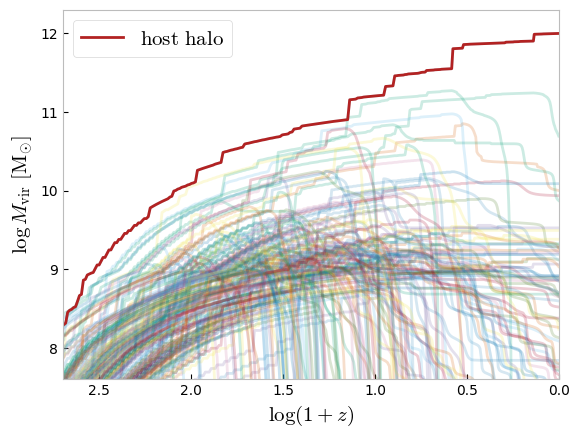

In [59]:

for i in range(tree_data["mass"].shape[0]):
    plt.plot(np.log(tree_data["redshift"]+1), np.log10(tree_data["mass"][i]), alpha=0.2)

plt.plot(np.log(tree_data["redshift"]+1), np.log10(tree_data["mass"][0]), color="firebrick", label="$\mathrm{host\ halo}$")
plt.xlim(2.7,0)
plt.ylim(7.6, 12.3)
plt.legend()
plt.xlabel("$\log (1+z)$")
plt.ylabel("$\log M_{\mathrm{vir}}\ [\mathrm{M}_{\odot}]$")

plt.savefig("../../figures/paper/single_host_history.pdf", bbox_inches='tight')

plt.show()


In [55]:
# thin = 15

# norm = Normalize(vmin=100, vmax=300)
# cmap = plt.get_cmap('RdBu')

# plt.figure(figsize=(8,6))
# for i in np.random.randint(0,1000,30):
#     plt.plot(np.log(tree_data["redshift"]+1), mat_delta[i], color=cmap(norm(N_sub_delta[i])), alpha=0.2)

# sm = ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, label='$\mathrm{subhalos}\ \mathrm{accreted}$')


# plt.errorbar(np.log(tree_data["redshift"][::thin]+1), quant_delta[1][::thin], yerr=error_delta, fmt="o", capsize=5, color="black")
# plt.xlim(2.6,0)
# plt.xlabel("$\log (1+z)$")
# plt.ylabel("$\log M_{\mathrm{host}}\ [\mathrm{M}_{\odot}]$")
# # plt.axhline(12, color="slateblue", ls="--")
# # plt.text(2.5, 11.8, "target mass", color="slateblue")
# plt.ylim(7.5, 13)
# #plt.savefig("../../figures/main_progen_delta.pdf")
# plt.show()

In [11]:
# thin = 15

# plt.figure(figsize=(8,6))
# for i in np.random.randint(0,1000,30):
#     plt.plot(np.log(tree_data["redshift"]+1), mat_sigma[i], color=cmap(norm(N_sub_sigma[i])), alpha=0.2)

# sm = ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, label='$\mathrm{subhalos}\ \mathrm{accreted}$')


# plt.errorbar(np.log(tree_data["redshift"][::thin]+1), quant_sigma[1][::thin], yerr=error_sigma, fmt="o", capsize=5, color="black")
# plt.xlim(2.6,0)
# plt.xlabel("$\log (1+z)$")
# plt.ylabel("$\log M_{\mathrm{host}}\ [\mathrm{M}_{\odot}]$")
# # plt.axhline(12.15, color="slateblue", ls="--")
# # plt.axhline(11.85, color="slateblue", ls="--")
# # plt.text(2.5, 11.95, "target mass range", color="slateblue")
# plt.ylim(7.5, 13)
# #plt.savefig("../../figures/main_progen_sigma.pdf")
# plt.show()

In [12]:
# mat_sigma, quant_sigma, error_sigma = main_progenitor_history("/netb/vdbosch/jsm99/data/cross_host_3_10k/", Ntree=1000)

In [13]:
# thin = 15

# plt.figure(figsize=(6,6))
# for i in mat_sigma[np.random.randint(0,1000,30)]:
#     plt.plot(np.log(tree_data["redshift"]+1), i, color="grey", alpha=0.2)

# plt.errorbar(np.log(tree_data["redshift"][::thin]+1), quant_sigma[1][::thin], yerr=error_sigma, fmt="o", capsize=5, color="black")
# plt.xlim(2.6,0)
# plt.xlabel("$\log (1+z)$")
# plt.ylabel("$\log M_{\mathrm{host}}\ [\mathrm{M}_{\odot}]$")
# # plt.axhline(12, color="firebrick", ls="--")
# # plt.text(2.5, 11.8, "target mass", color="firebrick")
# #plt.xscale("log")
# #plt.savefig("../../figures/main_progen_sigma.pdf")
# plt.show()